<img width=700px; src="logoUPSayPlusCDS_990.png">

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Scipy and Statsmodels libraries</big></big></big></big></b></p>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

## 1. File input/output - `scipy.io`

Scipy provides an `io` module to help load some data type. We can easily read MATLAB `.mat` files using `io.loadmat` and `io.savemat`.

In [3]:
from scipy.io import loadmat, savemat
a = np.ones((3, 3))
savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = loadmat('file.mat', struct_as_record=True)
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

<div class="alert alert-success">

<b>EXERCISE - `scipy.io`</b>:

 <ul>
  <li>Load the matfile from `data/spectra.mat` using `scipy.io.loadmat`.</li>
  <li>Extract from the loaded dictionary two variables (`spectra`, `frequency`). You should call `ravel` the `frequency` array to obtain a 1-D array.</li>
  <li>Plot the spectra in function of the frequency.</li>
</ul>

</div>

In [4]:
from scipy.io import loadmat
data = loadmat('data/spectra.mat', struct_as_record=True)
data


{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jul  2 10:28:00 2017',
 '__version__': '1.0',
 'frequency': array([[ 400.095,  402.626,  405.155, ..., 3996.41 , 3997.88 , 3999.36 ]]),
 'spectra': array([[0.0152963, 0.0152944, 0.0153142, ..., 0.017305 , 0.0170706,
         0.0172018],
        [0.0143634, 0.0143292, 0.0143999, ..., 0.018519 , 0.0186104,
         0.0187633],
        [0.0163027, 0.0161848, 0.0163573, ..., 0.017772 , 0.0179032,
         0.0175998],
        ...,
        [0.0145195, 0.014399 , 0.0143937, ..., 0.0176497, 0.0174543,
         0.0174893],
        [0.0157462, 0.015478 , 0.0154057, ..., 0.0177981, 0.0178682,
         0.0179989],
        [0.0160526, 0.0163989, 0.0162803, ..., 0.0182082, 0.0180114,
         0.0182391]])}

In [5]:
spectra = data['spectra']
spectra

array([[0.0152963, 0.0152944, 0.0153142, ..., 0.017305 , 0.0170706,
        0.0172018],
       [0.0143634, 0.0143292, 0.0143999, ..., 0.018519 , 0.0186104,
        0.0187633],
       [0.0163027, 0.0161848, 0.0163573, ..., 0.017772 , 0.0179032,
        0.0175998],
       ...,
       [0.0145195, 0.014399 , 0.0143937, ..., 0.0176497, 0.0174543,
        0.0174893],
       [0.0157462, 0.015478 , 0.0154057, ..., 0.0177981, 0.0178682,
        0.0179989],
       [0.0160526, 0.0163989, 0.0162803, ..., 0.0182082, 0.0180114,
        0.0182391]])

In [6]:
frequency = data['frequency'].ravel()
frequency

array([ 400.095,  402.626,  405.155, ..., 3996.41 , 3997.88 , 3999.36 ])

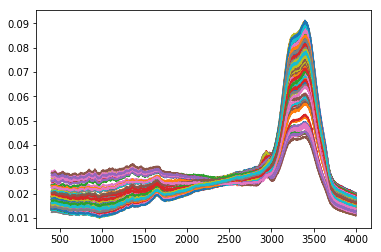

In [7]:
plt.plot(frequency, spectra.T)
plt.show()

## 2. Signal interpolation - `scipy.interpolate`

The scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. By imagining experimental data close to a sine function:

In [8]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

The `scipy.interpolate.interp1d` class can build a linear interpolation function:

In [9]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
linear_interp

Then the `scipy.interpolate.linear_interp` instance needs to be evaluated at the time of interest:

In [10]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

A cubic interpolation can also be selected by providing the `kind` optional keyword argument:

In [11]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

Let's see the difference by plotting the results.

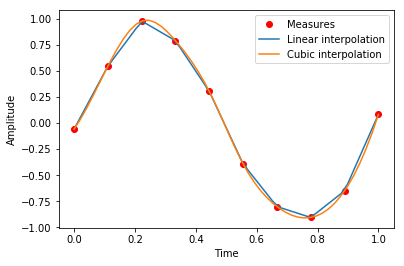

In [12]:
plt.plot(measured_time, measures, 'or', label='Measures')
plt.plot(computed_time, linear_results, label='Linear interpolation')
plt.plot(computed_time, cubic_results, label='Cubic interpolation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

<div class="alert alert-success">

<b>EXERCISE - `scipy.interpolate`</b>:

 <ul>
  <li>Interpolate each spectra values corresponding to the integral frequencies {401, 402, ..., 3999} using `scipy.interpolate.interp1d`.</li>
  <li>Plot the spectra in function of the frequencies.</li>
</ul>

</div>

In [13]:
from scipy.interpolate import interp1d

frequency_interp = np.arange(401, 3999, 1)

spectra_interp = []
for spectrum in spectra:
    f_spectra = interp1d(frequency, spectrum)
    spectra_interp.append(f_spectra(frequency_interp))
    
# convert to a numpy array
spectra_interp = np.array(spectra_interp)
spectra_interp

array([[0.01529562, 0.01529487, 0.01529733, ..., 0.01734045, 0.01721092,
        0.01708124],
       [0.01435117, 0.01433766, 0.01433966, ..., 0.01853487, 0.01855568,
        0.0186228 ],
       [0.01626054, 0.01621396, 0.01621031, ..., 0.01784323, 0.01782466,
        0.0178786 ],
       ...,
       [0.01447641, 0.0144288 , 0.01439822, ..., 0.01760831, 0.01757127,
        0.01745714],
       [0.0156503 , 0.01554433, 0.01546731, ..., 0.01789042, 0.01782624,
        0.0178788 ],
       [0.01617643, 0.01631325, 0.01638136, ..., 0.0181718 , 0.01812921,
        0.01802986]])

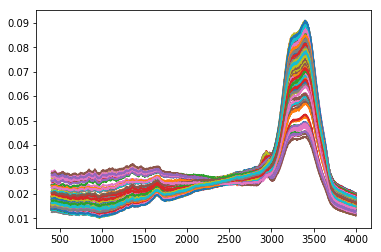

In [14]:
plt.plot(frequency_interp, spectra_interp.T)
plt.show()

## 3. Optimization - `scipy.optimize`

Optimization is the problem of finding a numerical solution to a minimization or equality.

The scipy.optimize module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [15]:
from scipy import optimize

### Finding the minimum of a scalar function

Let’s define the following function:

In [16]:
def f(x):
    return x ** 2 + 10 * np.sin(x)

and plot it:

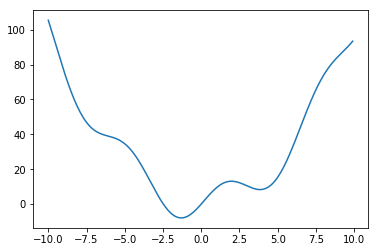

In [17]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The BFGS algorithm is a good way of doing this:

In [18]:
res = optimize.minimize(f, 0, method='L-BFGS-B')
res

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point:

In [19]:
res2 = optimize.minimize(f, 3, method='L-BFGS-B')
res2

      fun: array([8.31558558])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.77635684e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
   status: 0
  success: True
        x: array([3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use `scipy.optimize.basinhopping()` (which combines a local optimizer with stochastic sampling of starting points for the local optimizer):

In [20]:
optimize.basinhopping(f, 3, niter=1000)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08580037]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 18624
                        nit: 1000
                       njev: 6208
                          x: array([-1.30644001])

### Finding the roots of a scalar function

To find a root, i.e. a point where $f(x) = 0$, of the function f above we can use for example `scipy.optimize.fsolve()`:

In [21]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [22]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### Curve fitting

Suppose we have data sampled from $f$ with some noise:

In [23]:
xdata = np.linspace(-10, 10, num=100)
ydata = f(xdata) + np.random.normal(0, 2, xdata.shape)

Now if we know the functional form of the function from which the samples were drawn ($x^2 + \sin(x)$ in this case) but not the amplitudes of the terms, we can find those by least squares curve fitting. First we have to define the function to fit:

In [24]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use `scipy.optimize.curve_fit()` to find $a$ and $b$:

In [25]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([ 0.99629775, 10.29627106])

### Summary in a single plot

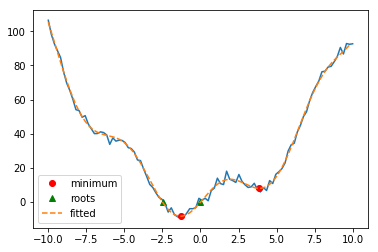

In [26]:
x = np.arange(-10, 10, 0.1)
plt.plot(xdata, ydata)
# plot the local minima
plt.plot(res.x, f(res.x), 'or', label='minimum')
plt.plot(res2.x, f(res2.x), 'or')
# plot the roots
plt.plot(root, f(root), '^g', label='roots')
plt.plot(root2, f(root2), '^g')
# plot the curved fitted
plt.plot(x, f2(x, params[0], params[1]), '--', label='fitted')
plt.legend()
plt.show()

<div class="alert alert-success">

<b>EXERCISE - `scipy.optimize`</b>:

The previous spectra can be modelled using a simple function `model_bi_functions` which we defined as:

<br><br>

$$
    S(f)=\left\{
                \begin{array}{ll}
                  a f + b, & 0 < f < \mu - 3 \sigma \\
                  (a (\mu - 3 \sigma) + b) + \exp\left( - \frac{(f - \mu)^{2}}{2 \sigma^{2}} \right), & f \geq \mu - 3 \sigma\\
                \end{array}
              \right.
$$

See below a plot which illustrate the profile of this function.

 <ul>
  <li>Using `scipy.optimize.curve_fit`, fit `model_bi_functions` in the first spectra from `spectra_interp`. You also have to use `frequency_interp` as `x` values. Use the initial parameters `[0.0, 0.01, 100, 3300, 300]`</li>
  <li>Plot the results.</li>
</ul>

</div>

In [28]:
# import helper regarding normal distribution
from scipy.stats import norm

def find_nearest_index(array, value):
    """Find the nearest index of a value in an array."""
    idx = (np.abs(array - value)).argmin()
    return idx

def model_bi_functions(freqs, a=1e-5, b=0.01,
                      scale=100, mu=3300, sigma=300):
    """Model to be fitted.
    
    It corresponds to a line from [0, f0] and a
    Normal distribution profile from [f0, end].
    
    Parameters
    ----------
    freqs : ndarray, shape (n_freqs,)
        Frequencies for which the spectrum will be calculated
        
    a : float, (default=1e-5)
        Slope of the line.
        
    b : float, (default=0.01)
        Values where the line cut the y-axis.
        
    scale : float, (default=100)
        Scaling factor for the amplitude of the Gaussian profile.
        
    mu : float, (default=3300)
        Central value of the Gaussian profile.
        
    sigma : float, (default=300)
        Standard deviation of the Gaussian profile.
    
    """
    y = np.zeros(freqs.shape)
    # find the index of the inflexion point
    f0_idx = find_nearest_index(freqs, mu - 3 * sigma)
    # line equation
    y[:f0_idx] = a * freqs[:f0_idx] + b
    # Gaussian profile
    y[f0_idx:] = ((a * freqs[f0_idx] + b) +
                  (scale * norm.pdf(freqs[f0_idx:], mu, sigma)))
    return y

Text(0,0.5,'Amplitude')

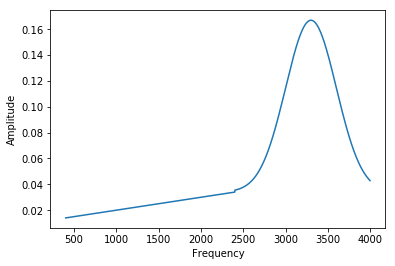

In [29]:
y = model_bi_functions(frequency_interp)
plt.plot(frequency_interp, y)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

In [36]:
from scipy.optimize import curve_fit

init_params = [0.0, 0.01, 100, 3300, 300]

popt, _ = curve_fit(model_bi_functions, frequency_interp, spectra_interp[0], p0=init_params)

popt

array([4.73429760e-06, 1.21638832e-02, 2.20975344e+01, 3.33386728e+03,
       1.72122469e+02])

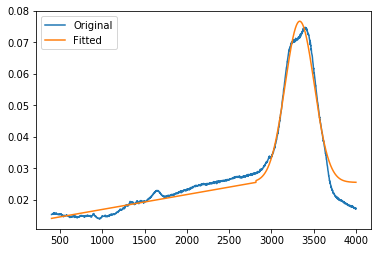

In [38]:
plt.plot(frequency_interp, spectra_interp[0], label='Original')
plt.plot(frequency_interp, model_bi_functions(frequency_interp, popt[0], popt[1], popt[2], popt[3], popt[4]), label='Fitted')
plt.legend()

## 4. Numerical integration - `scipy.integrate`

Given a function object, the most generic integration routine is `scipy.integrate.quad()`.

In [39]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi / 2)
res

0.9999999999999999

If only fixed sample are given, the trapeze method (`scipy.integrate.trapz()`) or Simpson's integration rule `scipy.integrate.simps()`) can be used.

In [40]:
x = np.linspace(0, np.pi / 2, num=200)
y = np.sin(x)

In [41]:
from scipy.integrate import simps
res = simps(y, x)
res

0.9999999794485694

<div class="alert alert-success">

<b>EXERCISE - `scipy.integrate`</b>:

We would be interested in the area under the Gaussian profile since it is related to what we want to quantify.

 <ul>
  <li>Using `scipy.integrate.simps`, compute the area under the Gaussian profile between $[\mu - 3 \sigma, \mu + 3 \sigma]$. Those parameters can be found as the results of the curve fitting previusly done. The indexes corresponding to the interval values can be computed using `find_nearest_index`.</li>
  <li>You can do the same using the original data to see the difference od quantification.</li>
</ul>

</div>

In [42]:
from scipy.integrate import simps

# compute the bounds
lower_bound = find_nearest_index(frequency_interp, popt[3] - 3 * popt[4])
upper_bound = find_nearest_index(frequency_interp, popt[3] + 3 * popt[4])

# compute the model
fitted_model = model_bi_functions(frequency_interp, popt[0], popt[1], popt[2], popt[3], popt[4])

# integrate the model
integral_fitted = simps(fitted_model[lower_bound:upper_bound], frequency_interp[lower_bound:upper_bound])
print('Integration on the fitted data: {0:.2f}'.format(integral_fitted))

# integrate the model
integral_original = simps(spectra_interp[0][lower_bound:upper_bound], frequency_interp[lower_bound:upper_bound])
print('Integration on the fitted data: {0:.2f}'.format(integral_original))

Integration on the fitted data: 48.35
Integration on the fitted data: 47.74


## 5. Linear algebra - `scipy.linalg`

The `scipy.linalg` offers basic operation used in linear algebra such as inverse (`scipy.linalg.inv`), pseudo-inverse (`scipy.linalg.pinv`), determinant (`scipy.linalg.det`) as well as decompostion as standard decompisition as SVD, QR, or Cholesky among others.

<div class="alert alert-warning">

<b>`np.array` vs. `np.matrix`:</b>

<br><br>

By default the multiplication between two `np.array` (i.e. `*` operator) do not lead to a matrix multiplication. You need to use `np.dot` to perform this operation.

<br><br>

Another possibility is to convert the `np.array` to `np.matrix` which perform this operation when using the operator `*`. The operations become more readable when there is a lot of algebric operations involved.

<br><br>

We illustrate this behaviour in the example below.

</div>

Let's declare two arrays of shape $3 \times 3$ and $3 \times 1$, respectively.

In [ ]:
A = np.array([[ 3,  3, -1],
              [ 2, -3,  4],
              [-1, .5, -1]])

b = np.array([[ 1],
              [-2],
              [ 0]])

Using the `*` operator does not lead to a matrix multiplication since the matrix returned is a $3 \times 3$ matrix. Instead, it multiply each column of $A$ by the vector $b$.

In [ ]:
A * b

You need to use the function `np.dot` to obtain the matrix multiplication.

In [ ]:
np.dot(A, b)

However, by converting $A$ and $b$ to matrices (i.e., `np.matrix`), it is possible to use the `*` operator directly.

In [ ]:
A = np.matrix(A)
b = np.matrix(b)

A * b

<div class="alert alert-success">

<b>EXERCISE - `scipy.linalg`</b>:

 <ul>
  <li>Solve the following system of linear equations using the normal equation.</li>
</ul>
<br>

$$
\left[\begin{array}{cc} 
3x & 3y & -z \\
2x & -3y & 4z \\
-x & .5y & -z
\end{array}\right]
\left[\begin{array}{cc} 
x_1 \\ 
x_2 \\
x_3
\end{array}\right] = 
\left[\begin{array}{cc} 
-1 \\ 
-2 \\
0
\end{array}\right]
$$

This problem can be seen as:
$$ A x = b $$

$x$ can be find such that:

$$ x = (A^{T} A)^{-1} A^{T} b $$

Find $x$ using the above equation

</div>

In [43]:
# A and b wiil be defined as matrices to allow
# easy matrix multiplication

A = np.matrix([[3, 3, -1], [2, -3, 4], [-1, .5, -1]])

b = np.matrix([[1],[-2], [0]])

In [44]:
from scipy.linalg import inv

x = inv(A.T * A) * A.T * b

print('The solution x is equal to:')
print(x)

The solution x is equal to:
[[ 4.]
 [-6.]
 [-7.]]


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Solve the following system of linear equations using SVD.</li>
</ul>
<br>

The above problem can also be solved using an SVD decomposition such that:

$$ x = V S^{-1} (U^{T} b) $$

where $U$, $S$, and $V^{T}$ can be found with `scipy.linalg.svd` such that:
`U, S, Vh = svd(A)`

</div>

In [45]:
from scipy.linalg import svd

U, S, V = svd(A)

# convert into matrix to simplify the multiplication
U = np.matrix(U)
S = np.matrix(np.diag(S))
V = np.matrix(V)

x = V.T * inv(S) * (U.T * b)

print('The solution x is equal to:')
print(x)

The solution x is equal to:
[[ 4.]
 [-6.]
 [-7.]]


## 6. Statistics - `scipy.stats` and `statsmodel`

### `scipy.stats`

`scipy.stats` contains mainly helper of most common [continuous](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) and [discrete](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) distribution.

In addition, this module contain statistical functions to perform statistical tests for instance.

In [46]:
import pandas as pd
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


#### 1-sample t-test

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value. Let see if the VIQ of our population is equal to 0.

In [47]:
from scipy.stats import ttest_1samp

ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

With a p-value of $10^{-28}$ we can claim that the population mean for the IQ (VIQ measure) is not 0.

#### 2-sample t-test

`scipy.stats.ttest_ind()` can compare two populations and check if the difference is significant or not. We can study if there is a difference of the VIQ between Male and Female.

In [55]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


To see if this difference is significant, we can use `scipy.stats.ttest_ind()`.

In [56]:
from scipy.stats import ttest_ind
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Test the difference between weights in males and females. You can fill the missing data using `pandas.fillna()` and using the mean weight of the population.</li>
  <li>Use non parametric statistics to test the difference between VIQ in males and females (refer to `scipy.stats.mannwhitneyu`).</li>
</ul>
<br>

</div>

In [57]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['Weight']:
    print(gender, value.mean())

Female 137.2
Male 166.44444444444446


In [58]:
from scipy.stats import ttest_ind
female_weight = data[data['Gender'] == 'Female']['Weight']
male_weight = data[data['Gender'] == 'Male']['Weight']
# fill the missing data with the mean
female_weight = female_weight.fillna(female_weight.mean())
male_weight = male_weight.fillna(male_weight.mean())
# compute the t-test
ttest_ind(female_weight, male_weight)


Ttest_indResult(statistic=-5.141559306492952, pvalue=8.52497853797666e-06)

In [60]:
from scipy.stats import mannwhitneyu
mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.17114434343636575)

### `statsmodels`

Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:
$$
    y = x \times coef + intercept + e
$$
where e is observation noise. We will use the statsmodels module to:

- Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
- Test that coef is non zero.

In [61]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

Then we specify an OLS model and fit it:

In [62]:
from statsmodels.formula.api import ols
model = ols("y ~ x + 1", data).fit()

We can inspect the various statistics derived from the fit:

In [63]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           8.56e-08
Time:                        20:49:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

**Intercept:** We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.

Let's see another example: is VIQ can be predicted using Gender.

In [64]:
from statsmodels.formula.api import ols
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sun, 02 Sep 2018   Prob (F-statistic):              0.445
Time:                        20:49:18   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Run an OLS to check if Weight can be predicted using Gender and Height.</li>
</ul>
<br>

</div>

In [65]:
data = data.fillna(data.mean())
model = ols("Weight ~ Gender + Height + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     19.05
Date:                Sun, 02 Sep 2018   Prob (F-statistic):           2.05e-06
Time:                        20:50:39   Log-Likelihood:                -167.28
No. Observations:                  40   AIC:                             340.6
Df Residuals:                      37   BIC:                             345.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -58.5652     62.522     -0.